# MNIST Dynamic Filter Classification

Note: This notebook is desinged to run with GPU runtime.

####[MDF-01]
Import modules and set random seeds.

In [1]:
import os, random
import numpy as np
from pandas import DataFrame

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

random.seed(20230515)
np.random.seed(20190222)
tf.random.set_seed(20190222)

####[MDF-02]
Download the MNIST dataset and store into NumPy arrays.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


####[MDF-03]
Define a CNN model with a single convolutional filter layer.

In [3]:
model = models.Sequential()
model.add(layers.Input(shape=(28*28,), name='input'))
model.add(layers.Reshape((28, 28, 1), name='reshape'))
model.add(layers.Conv2D(16, (5, 5), padding='same',
                        use_bias=True, activation='relu',
                        name='conv_filter'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu', name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_filter (Conv2D)                 │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling (MaxPooling2D)           │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,222,954 (12.29 MB)

 Trainable params: 3,222,954 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

####[MDF-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MDF-05]
Train the model. It achieves around 99% accuracy.

In [5]:
%%time
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.9002 - loss: 0.3439 - val_acc: 0.9807 - val_loss: 0.0588
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9839 - loss: 0.0531 - val_acc: 0.9837 - val_loss: 0.0474
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9915 - loss: 0.0302 - val_acc: 0.9856 - val_loss: 0.0460
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9945 - loss: 0.0191 - val_acc: 0.9851 - val_loss: 0.0480
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9964 - loss: 0.0132 - val_acc: 0.9844 - val_loss: 0.0502
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.9968 - loss: 0.0102 - val_acc: 0.9847 - val_loss: 0.0508
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9964 - loss: 0.0100 - val_acc: 0.9863 - val_loss: 0.0487
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9968 - loss: 0.0091 - val_acc: 0.9892 - val_loss: 0.0477
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - a

####[MDF-06]
Plot charts for the accuracy and loss values.

<Axes: >

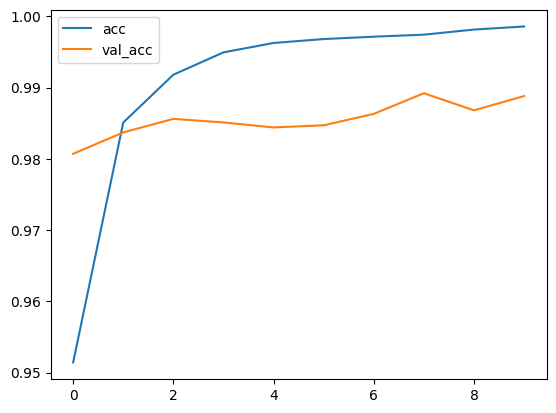

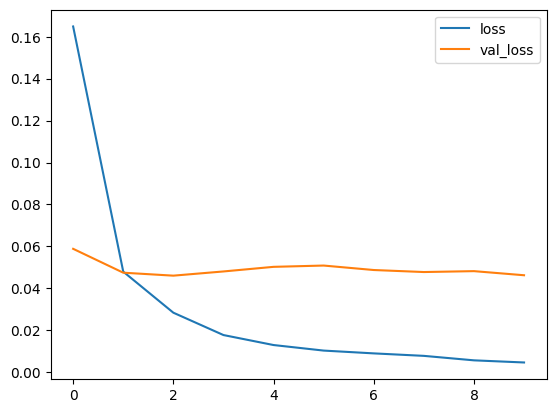

In [6]:
DataFrame({'acc': history.history['acc'],
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'],
           'val_loss': history.history['val_loss']}).plot()

####[MDF-07]
Mount your Google Drive on `/content/gdrive`.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####[MDF-08]
Export the trained model as a file `MNIST_single.keras` on your Google Drive.

In [8]:
model.save('/content/gdrive/My Drive/MNIST_single.h5')
!ls -lh '/content/gdrive/My Drive/MNIST_single.h5'

-rw------- 1 root root 37M Feb 15 09:14 '/content/gdrive/My Drive/MNIST_single.h5'
